# TASK #1: UNDERSTAND THE PROBLEM AND BUSINESS CASE

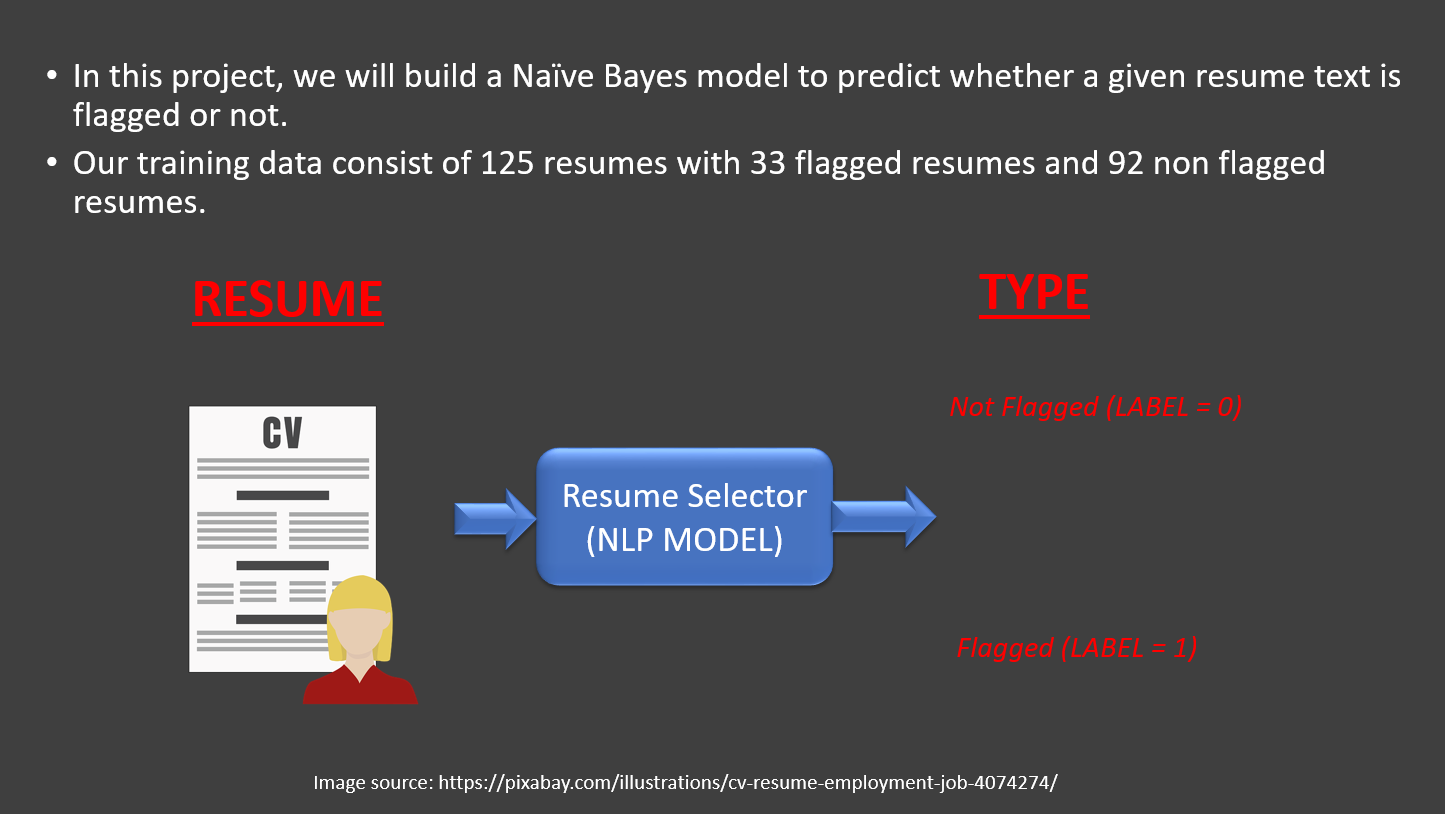

In [1]:
# Data Source: https://www.kaggle.com/samdeeplearning/deepnlp

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [2]:
# install nltk
# !pip install nltk

In [3]:
# install gensim
# !pip install gensim

In [4]:
# !pip install wordcloud

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [6]:
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [7]:
# load the data
resume_df = pd.read_csv('resume.csv', encoding = 'latin-1')
resume_df

resume_id        class  \
0      resume_1  not_flagged   
1      resume_2  not_flagged   
2      resume_3  not_flagged   
3      resume_4  not_flagged   
4      resume_5      flagged   
..          ...          ...   
120  resume_121  not_flagged   
121  resume_122  not_flagged   
122  resume_123  not_flagged   
123  resume_124      flagged   
124  resume_125  not_flagged   

                                           resume_text  
0    \rCustomer Service Supervisor/Tier - Isabella ...  
1    \rEngineer / Scientist - IBM Microelectronics ...  
2    \rLTS Software Engineer Computational Lithogra...  
3     TUTOR\rWilliston VT - Email me on Indeed: ind...  
4    \rIndependent Consultant - Self-employed\rBurl...  
..                                                 ...  
120  \rBrattleboro VT - Email me on Indeed: indeed....  
121  \rResearch and Teaching Assistant - University...  
122  \rMedical Coder - Highly Skilled - Entry Level...  
123  \rWaterbury VT - Email me on Indeed: indeed.co...  
124  \rResearch and Development Scientist - Burling...  

[125 rows x 3 columns]

In [8]:
# data containing resume
resume_df = resume_df[['resume_text', 'class']]
resume_df

resume_text        class
0    \rCustomer Service Supervisor/Tier - Isabella ...  not_flagged
1    \rEngineer / Scientist - IBM Microelectronics ...  not_flagged
2    \rLTS Software Engineer Computational Lithogra...  not_flagged
3     TUTOR\rWilliston VT - Email me on Indeed: ind...  not_flagged
4    \rIndependent Consultant - Self-employed\rBurl...      flagged
..                                                 ...          ...
120  \rBrattleboro VT - Email me on Indeed: indeed....  not_flagged
121  \rResearch and Teaching Assistant - University...  not_flagged
122  \rMedical Coder - Highly Skilled - Entry Level...  not_flagged
123  \rWaterbury VT - Email me on Indeed: indeed.co...      flagged
124  \rResearch and Development Scientist - Burling...  not_flagged

[125 rows x 2 columns]

MINI CHALLENGE #1: 
- Print the first and last elements in the dataframe. 

In [9]:
print(resume_df.head())
print()
print(resume_df.tail())

                                         resume_text        class
0  \rCustomer Service Supervisor/Tier - Isabella ...  not_flagged
1  \rEngineer / Scientist - IBM Microelectronics ...  not_flagged
2  \rLTS Software Engineer Computational Lithogra...  not_flagged
3   TUTOR\rWilliston VT - Email me on Indeed: ind...  not_flagged
4  \rIndependent Consultant - Self-employed\rBurl...      flagged

                                           resume_text        class
120  \rBrattleboro VT - Email me on Indeed: indeed....  not_flagged
121  \rResearch and Teaching Assistant - University...  not_flagged
122  \rMedical Coder - Highly Skilled - Entry Level...  not_flagged
123  \rWaterbury VT - Email me on Indeed: indeed.co...      flagged
124  \rResearch and Development Scientist - Burling...  not_flagged


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [10]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [11]:
# check for null values
resume_df.isnull().sum()

resume_text    0
class          0
dtype: int64

In [12]:
resume_df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [13]:
resume_df['class'] = resume_df['class'].apply(lambda x:1 if x=='flagged' else 0)
resume_df

<ipython-input-13-41b1145f427c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df['class'] = resume_df['class'].apply(lambda x:1 if x=='flagged' else 0)


resume_text  class
0    \rCustomer Service Supervisor/Tier - Isabella ...      0
1    \rEngineer / Scientist - IBM Microelectronics ...      0
2    \rLTS Software Engineer Computational Lithogra...      0
3     TUTOR\rWilliston VT - Email me on Indeed: ind...      0
4    \rIndependent Consultant - Self-employed\rBurl...      1
..                                                 ...    ...
120  \rBrattleboro VT - Email me on Indeed: indeed....      0
121  \rResearch and Teaching Assistant - University...      0
122  \rMedical Coder - Highly Skilled - Entry Level...      0
123  \rWaterbury VT - Email me on Indeed: indeed.co...      1
124  \rResearch and Development Scientist - Burling...      0

[125 rows x 2 columns]

MINI CHALLENGE #2:
- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

In [14]:
resume_df_0 = resume_df[resume_df['class']==0]
resume_df_1 = resume_df[resume_df['class']!=0]

In [15]:
print('resume_df_0 shape: ' + str(resume_df_0.shape))
print('resume_df_1 shape: ' + str(resume_df_1.shape))

resume_df_0 shape: (92, 2)
resume_df_1 shape: (33, 2)


# TASK #4: PERFORM DATA CLEANING

In [16]:
resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x.replace('\r', ''))
resume_df

<ipython-input-16-16dd644d4b48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x.replace('\r', ''))


resume_text  class
0    Customer Service Supervisor/Tier - Isabella Ca...      0
1    Engineer / Scientist - IBM Microelectronics Di...      0
2    LTS Software Engineer Computational Lithograph...      0
3     TUTORWilliston VT - Email me on Indeed: indee...      0
4    Independent Consultant - Self-employedBurlingt...      1
..                                                 ...    ...
120  Brattleboro VT - Email me on Indeed: indeed.co...      0
121  Research and Teaching Assistant - University o...      0
122  Medical Coder - Highly Skilled - Entry LevelSu...      0
123  Waterbury VT - Email me on Indeed: indeed.com/...      1
124  Research and Development Scientist - Burlingto...      0

[125 rows x 2 columns]

In [17]:
# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hancu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hancu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','subject', 're', 'edu', 'use', 'email', 'com'])
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [21]:
# Cleaned text
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)

In [22]:
print(resume_df)

                                           resume_text  class  \
0    Customer Service Supervisor/Tier - Isabella Ca...      0   
1    Engineer / Scientist - IBM Microelectronics Di...      0   
2    LTS Software Engineer Computational Lithograph...      0   
3     TUTORWilliston VT - Email me on Indeed: indee...      0   
4    Independent Consultant - Self-employedBurlingt...      1   
..                                                 ...    ...   
120  Brattleboro VT - Email me on Indeed: indeed.co...      0   
121  Research and Teaching Assistant - University o...      0   
122  Medical Coder - Highly Skilled - Entry LevelSu...      0   
123  Waterbury VT - Email me on Indeed: indeed.com/...      1   
124  Research and Development Scientist - Burlingto...      0   

                                               cleaned  
0    customer service supervisor tier isabella cata...  
1    engineer scientist ibm albert gregoritsch ecaw...  
2    lts software engineer computational lithogr

In [23]:
print(resume_df['cleaned'][0])

customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research proj

In [24]:
print(resume_df['resume_text'][0])

Customer Service Supervisor/Tier - Isabella Catalog CompanySouth Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26WORK EXPERIENCECustomer Service Supervisor/TierIsabella Catalog Company - Shelburne VT - August 2015 to Present2 Customer Service/Visual Set Up & Display/Website Maintenance¢ Supervise customer service team of a popular catalog company¢ Manage day to day issues and resolution of customer upset to ensure customer satisfaction¢ Troubleshoot order and shipping issues: lost in transit order errors damages¢ Manage and resolve escalated customer calls to ensure customer satisfaction¢ Assist customers with order placing cross-selling/upselling of catalog merchandise¢ Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility ¢ Website clean-up: adding images type up product information proofreadingAdministrative Assistant /Events Coordinator/Office Services AssistantEileen Fisher Inc - Irvington NY - 

In [25]:
print(len(resume_df['resume_text'][0]))
print(len(resume_df['cleaned'][0]))

5430
4117


# TASK #5: VISUALIZE CLEANED DATASET

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

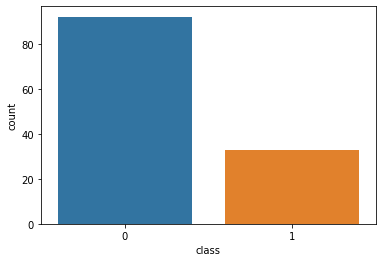

In [26]:
# Plot the counts of flagged vs not flagged
sns.countplot(resume_df['class'], label = 'Count Plot')

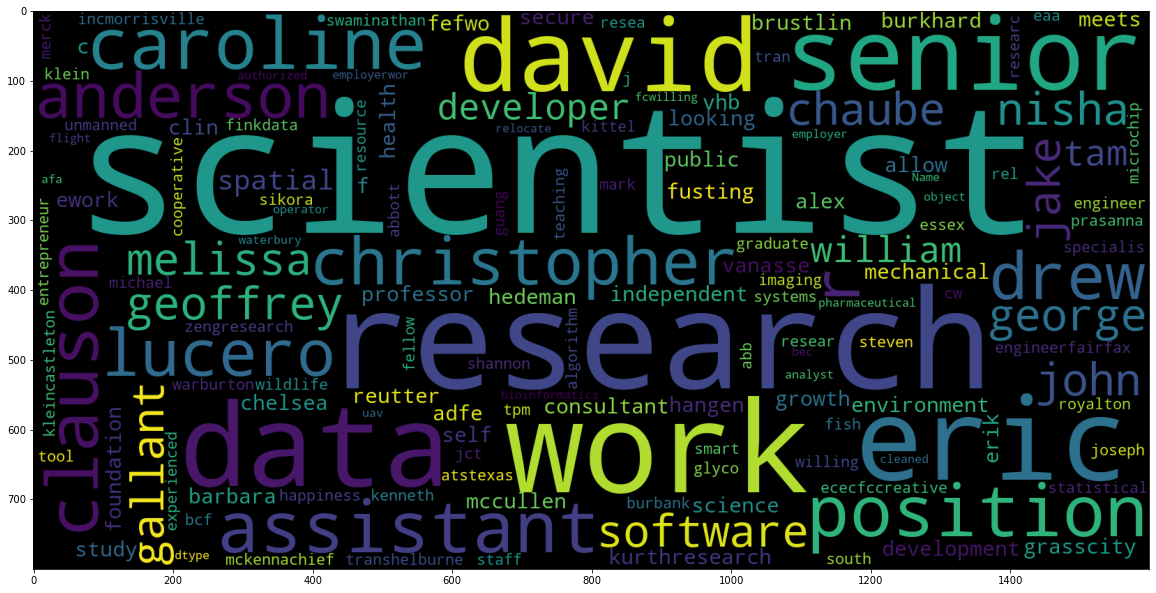

In [27]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))
plt.imshow(wc)

MINI CHALLENGE #3:
- Plot the wordcloud for class #0

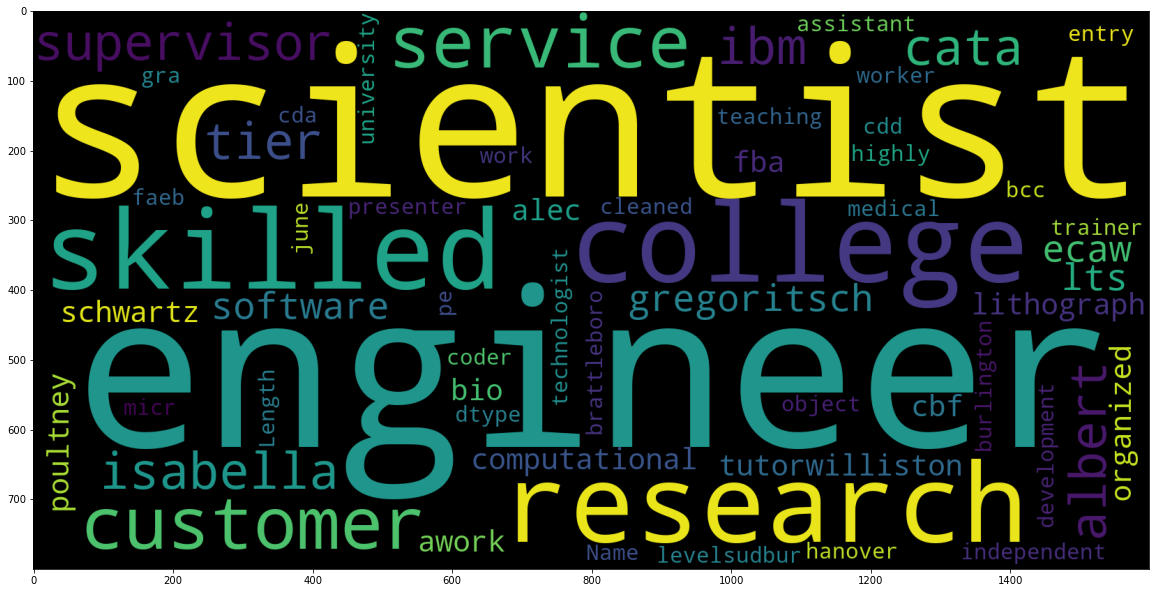

In [28]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']!=1].cleaned))
plt.imshow(wc)

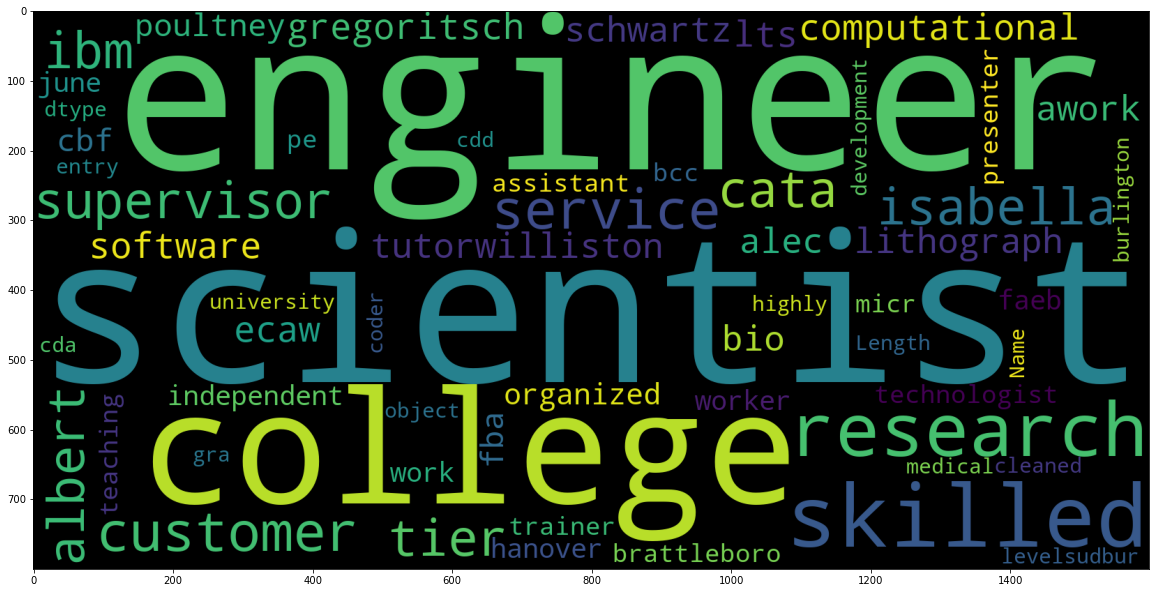

In [29]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))
plt.imshow(wc)

# TASK #6: PREPARE THE DATA BY APPLYING COUNT VECTORIZER

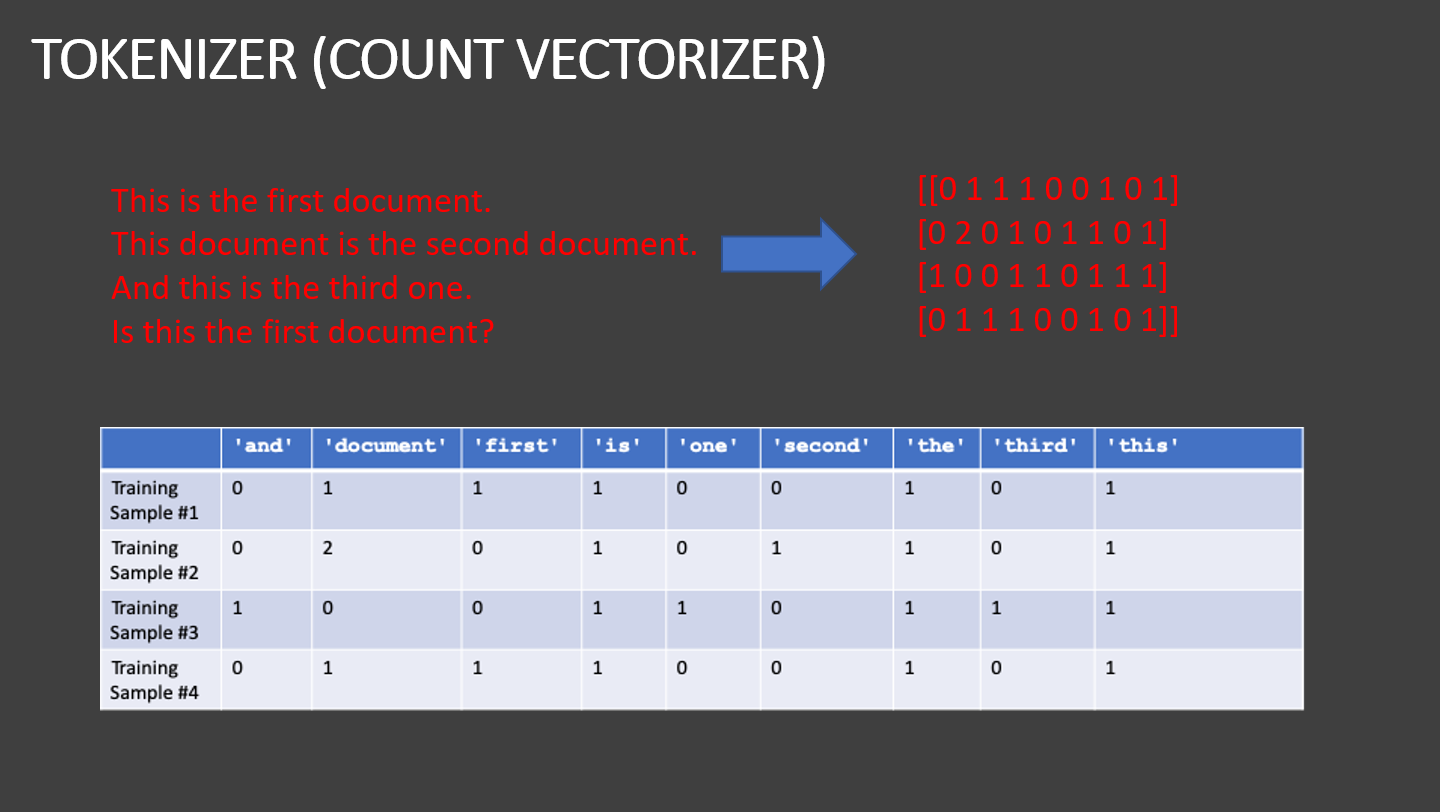

In [30]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [31]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [33]:
# Applying CountVectorier to the cleaned text
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])

In [34]:
print(vectorizer.get_feature_names())

['aaalac', 'aabb', 'aac', 'aacn', 'aacr', 'aacrjournals', 'aakeroõ_y', 'aanpcp', 'aaron', 'abbott', 'abdomen', 'abdominal', 'abdul', 'aberdeen', 'abi', 'abilities', 'ability', 'abiotic', 'able', 'abnormal', 'aboard', 'abosalem', 'abraham', 'abreast', 'abs', 'absence', 'absorbance', 'abstract', 'abstracta', 'abstractdisease', 'abstracted', 'abstractin', 'abstracts', 'abualrub', 'abundance', 'abureehan', 'abuse', 'abusiness', 'academia', 'academic', 'academics', 'academy', 'acaeefbc', 'accelerated', 'accept', 'acceptability', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accession', 'accident', 'accidents', 'accolateî', 'accommodations', 'accomplished', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountable', 'accounted', 'accounting', 'accounts', 'accreditation', 'accredited', 'accrual', 'accumulation', 'accuracy', 'accurate', 'accurately', 'accustomed'

In [35]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES CLASSIFIERS - PART #1

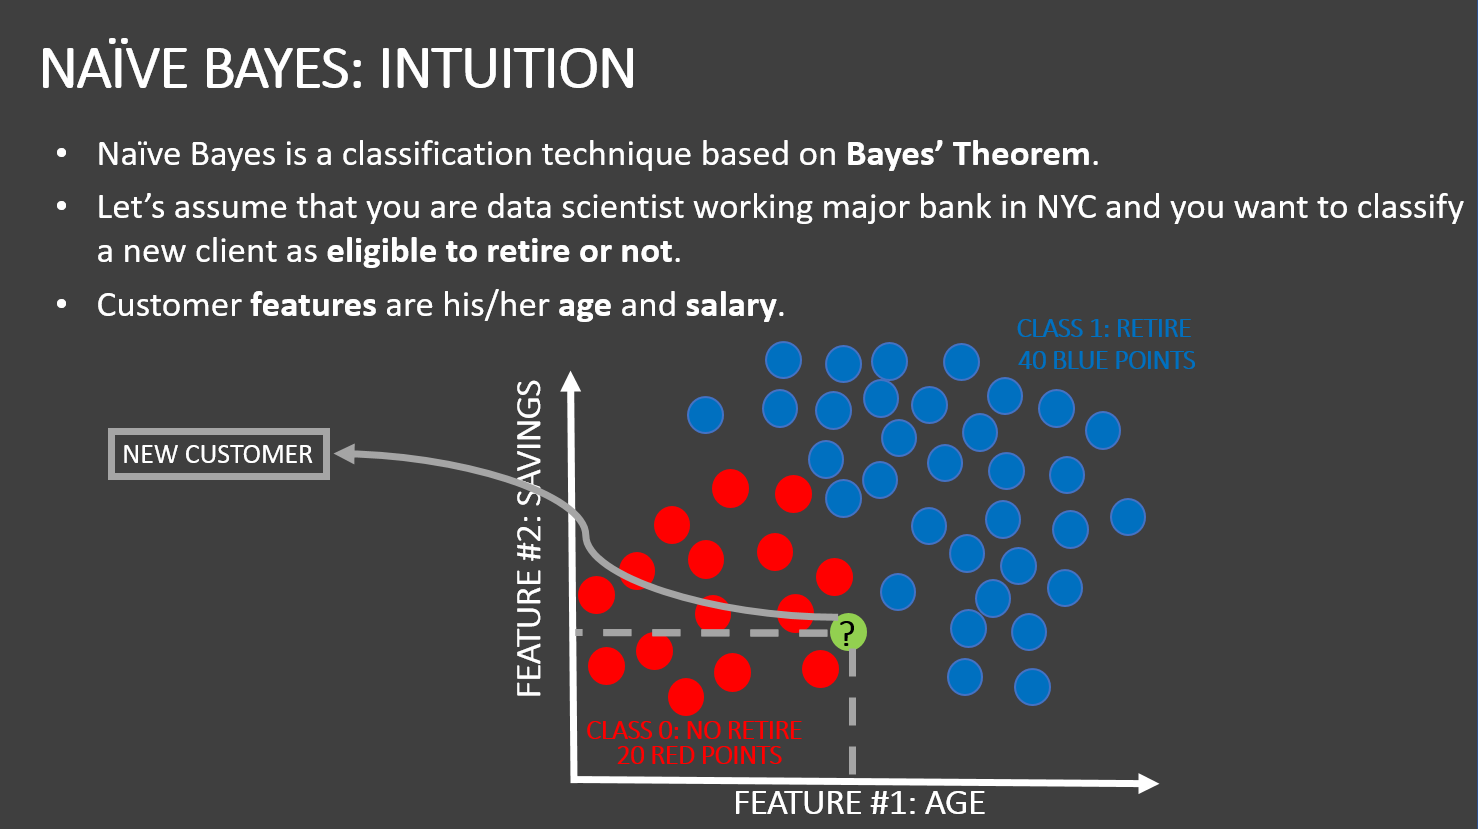

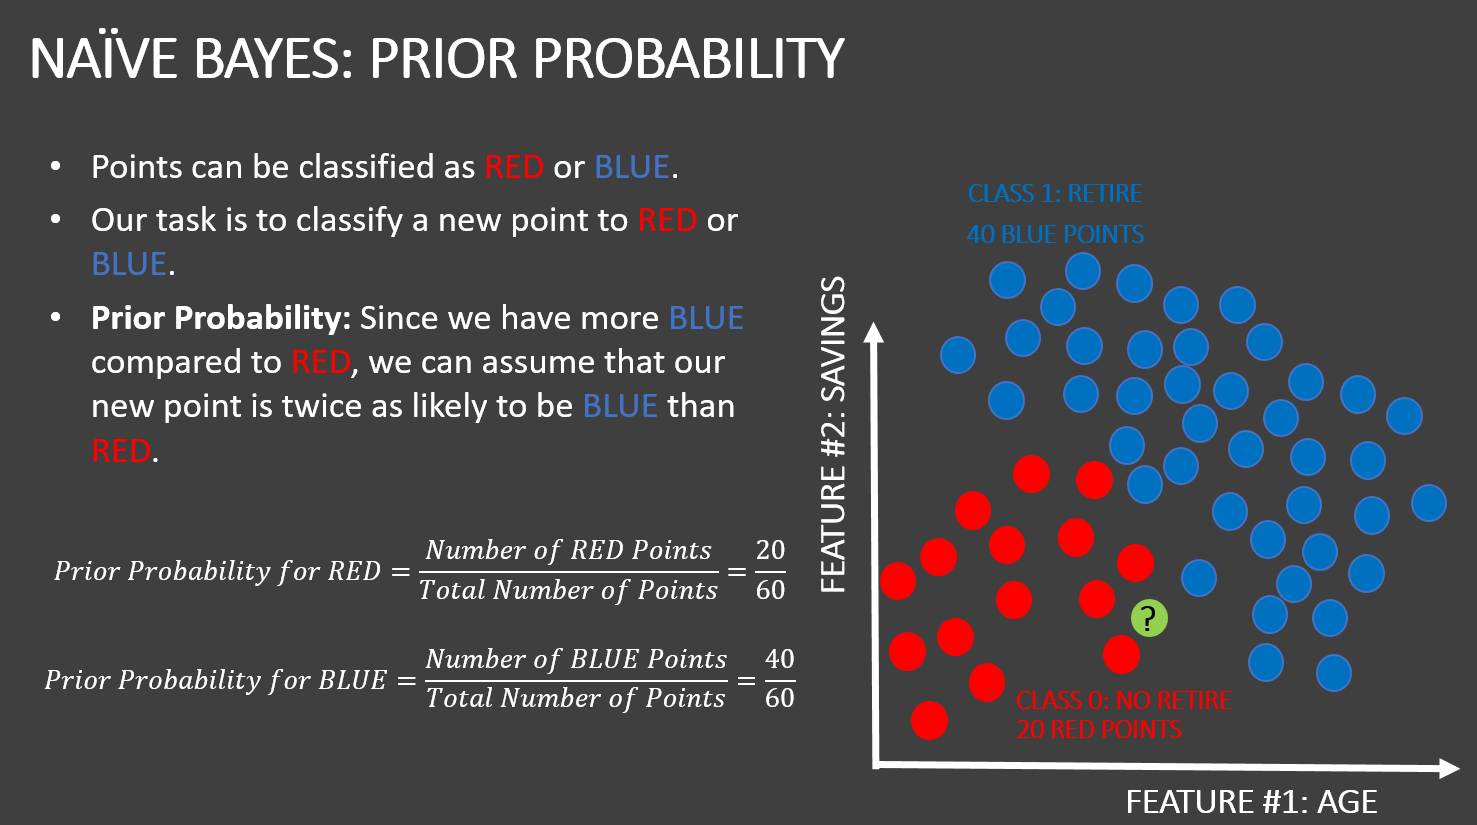

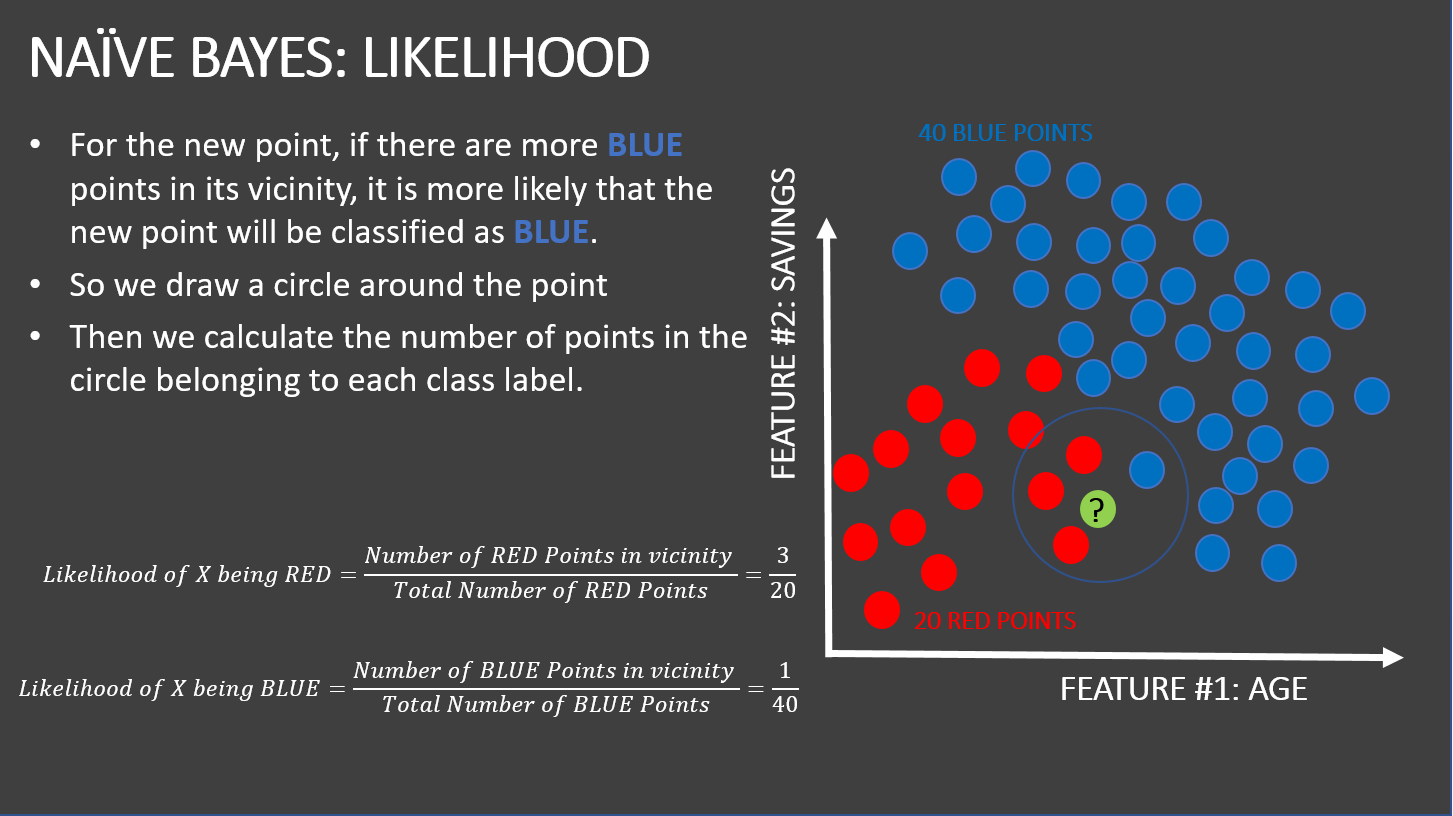

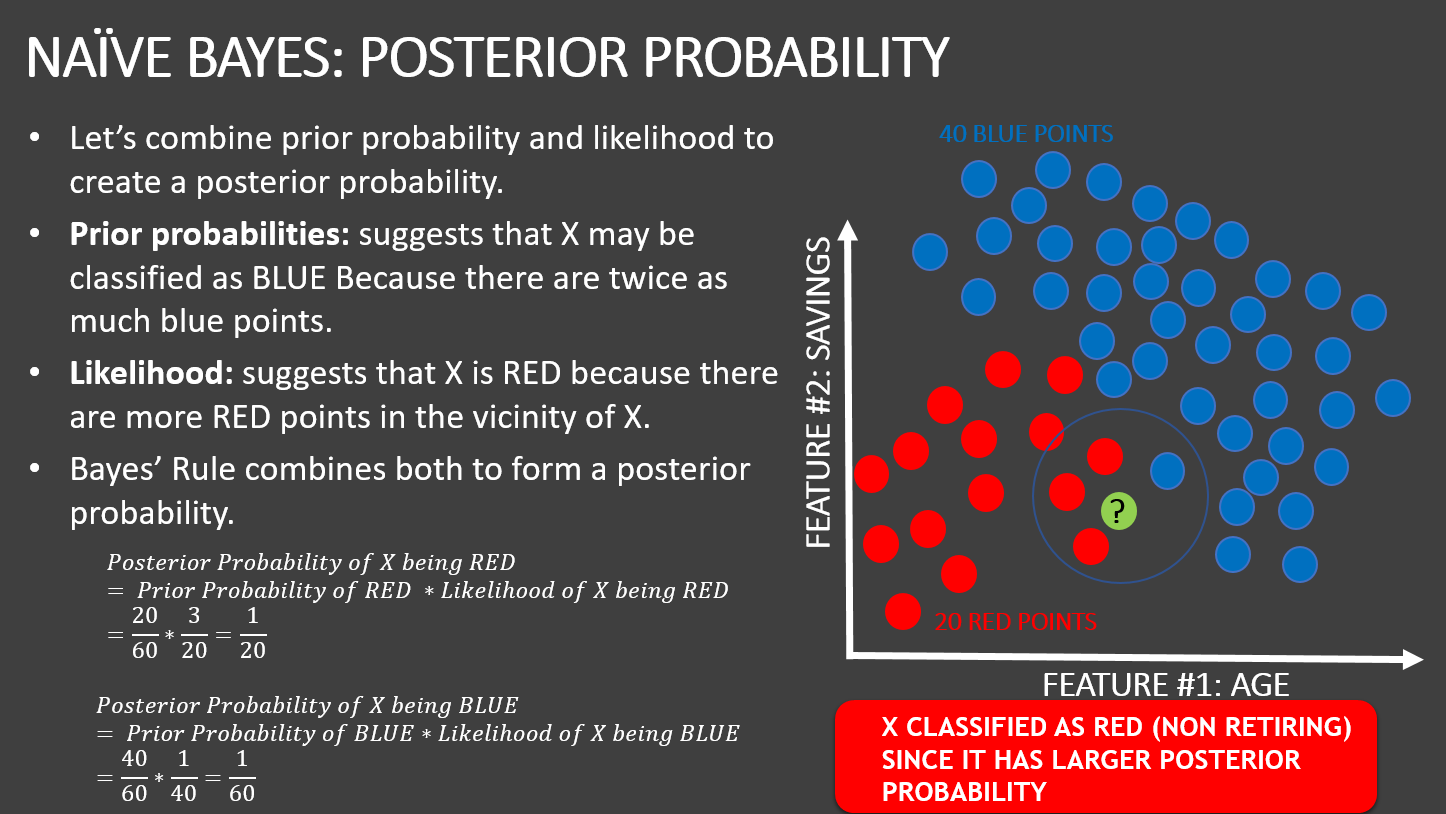

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES CLASSIFIERS - PART #2

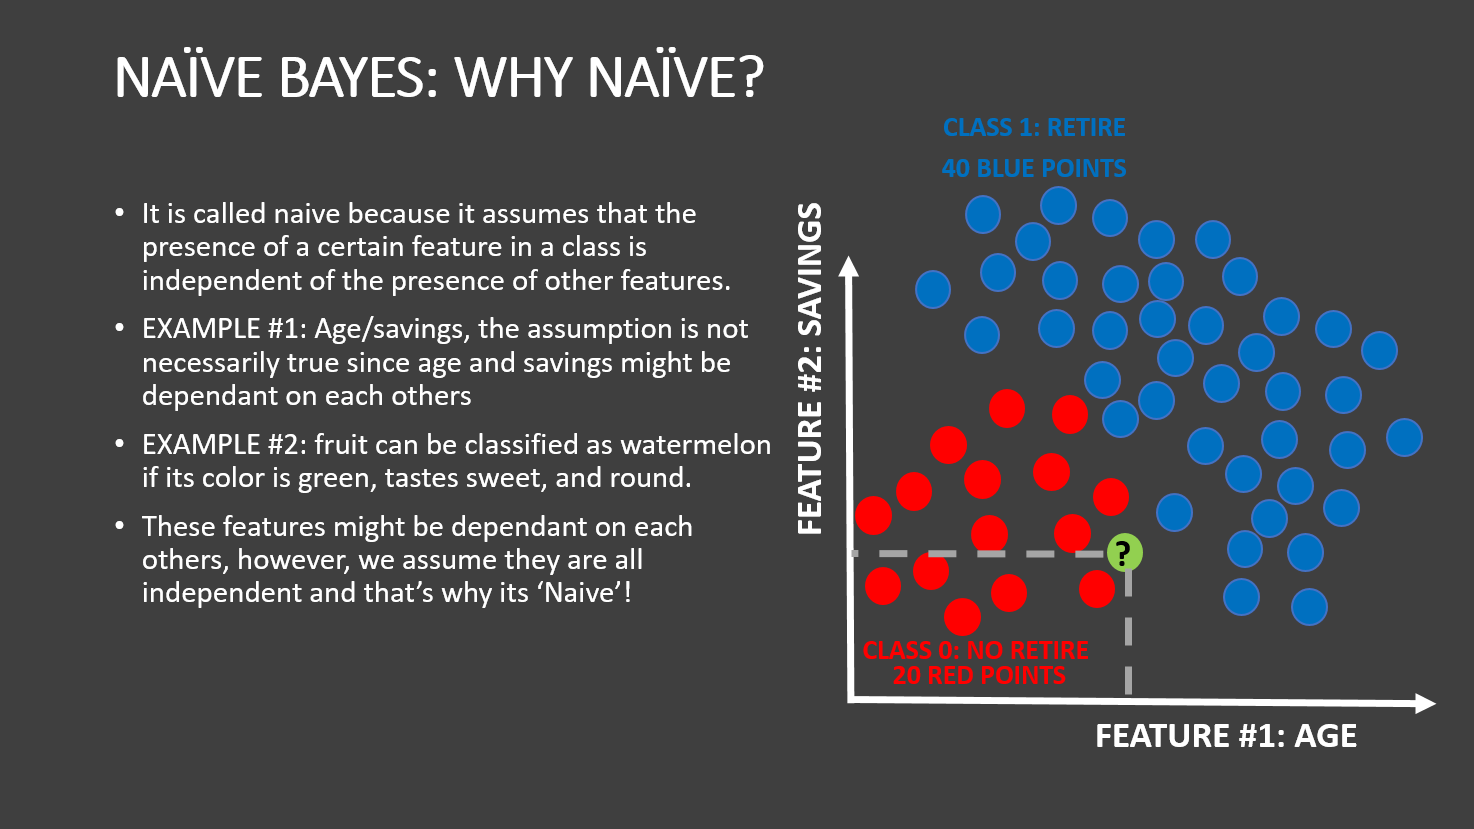

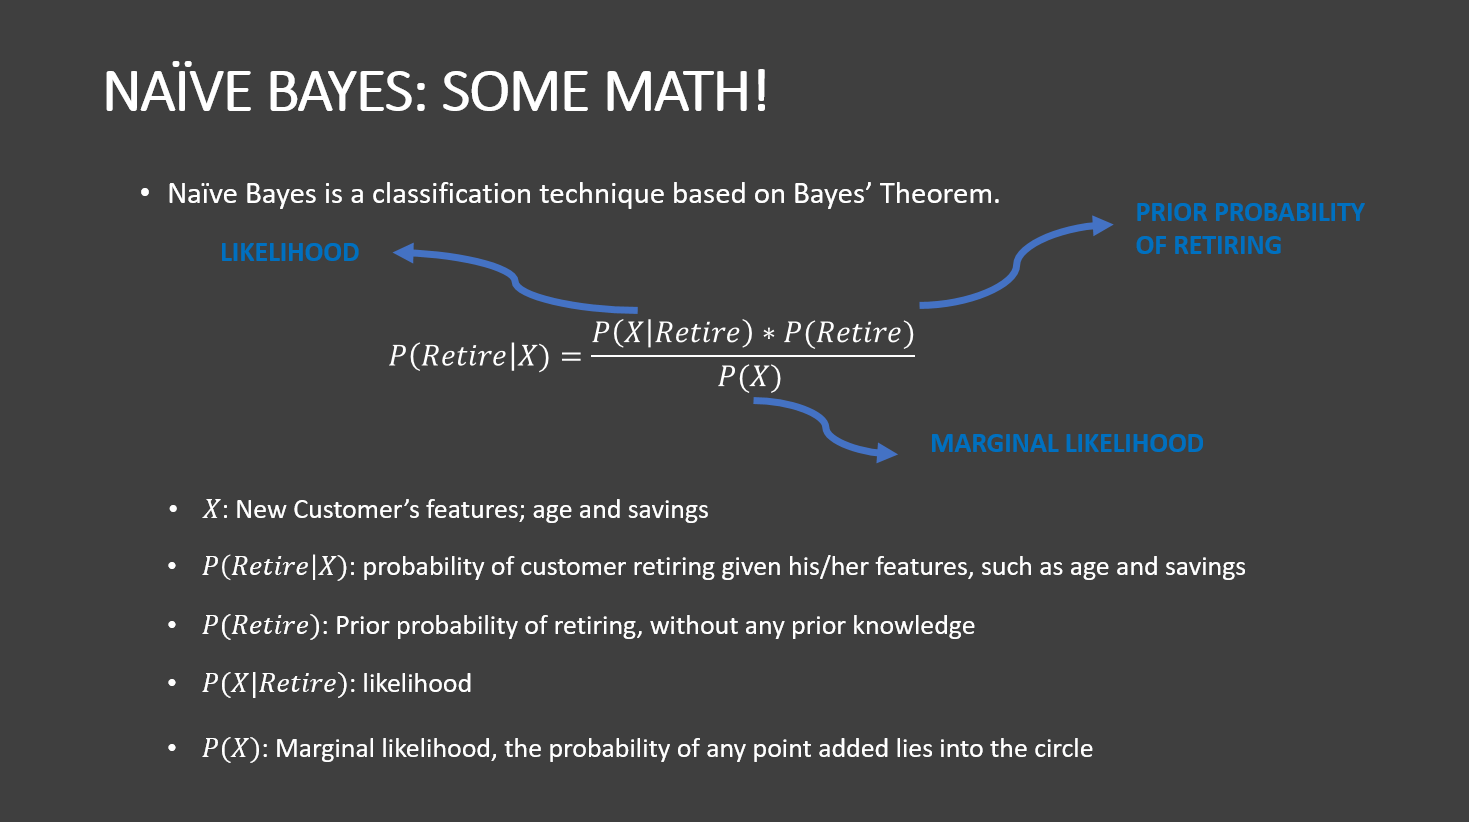

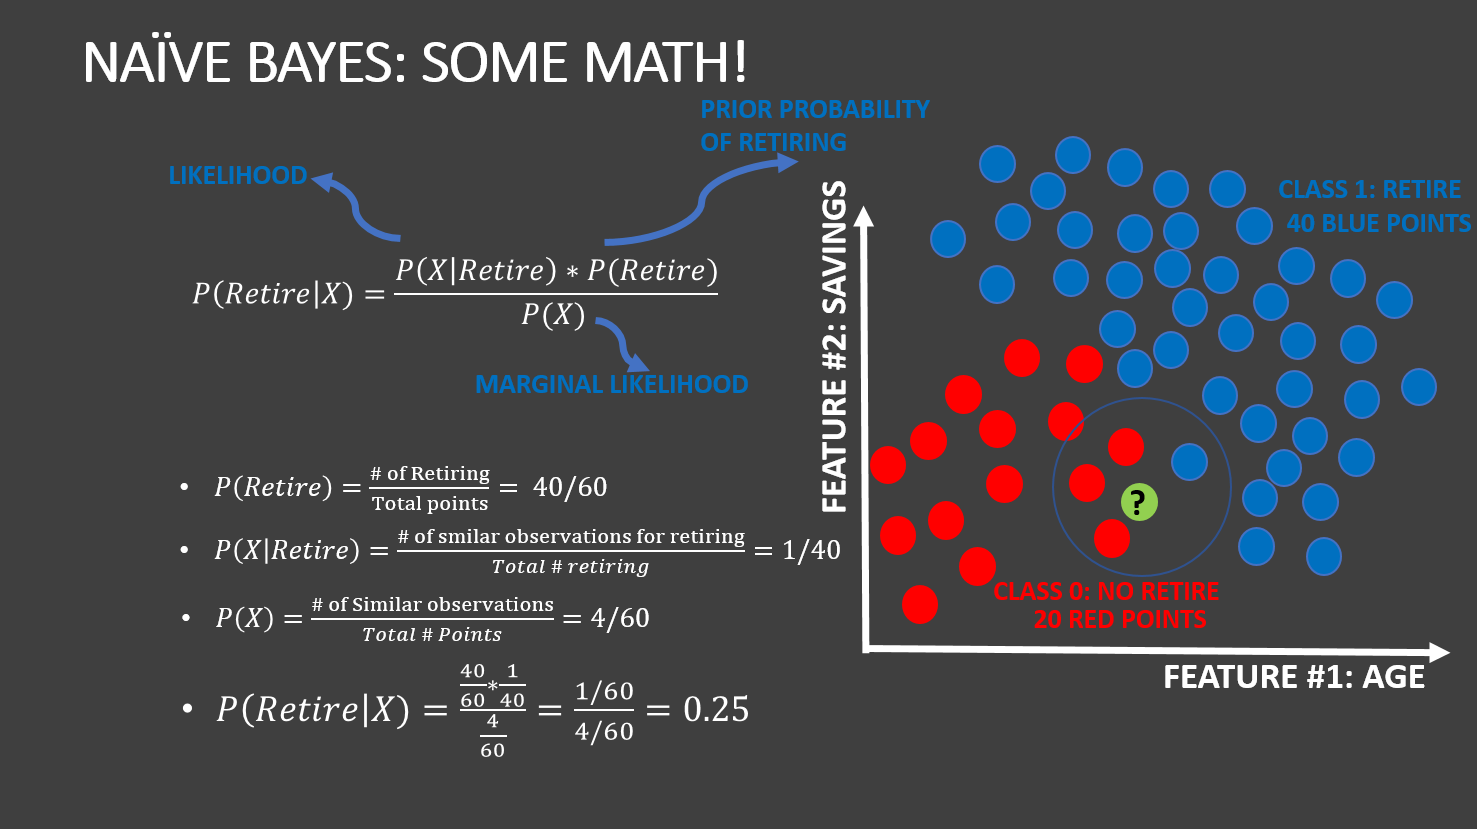

MINI CHALLENGE #4:
- Calculate the probability of the red class (non-retiring).

In [36]:
P_Retire = 20 / 60
P_X_Retire = 3 / 20
P_X = 4 / 60
P_Retire_X = (P_Retire * P_X_Retire) / P_X
P_Retire_X

0.75

# TASK#9: TRAIN NAIVE BAYES CLASSIFIER MODEL

In [37]:
countvectorizer

<125x11315 sparse matrix of type '<class 'numpy.int64'>'
	with 35687 stored elements in Compressed Sparse Row format>

In [38]:
X = countvectorizer

In [39]:
y = resume_df['class']

In [40]:
X.shape

(125, 11315)

In [41]:
y.shape

(125,)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

MINI CHALLENGE #5:
- Split the data into 25% testing and 75% training and perform a sanity check



In [44]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [45]:
# from sklearn.naive_bayes import MultinomialNB

# NB_classifier_test = MultinomialNB()
# NB_classifier_test.fit(X_train, y_train)

# TASK #10: ASSESS TRAINED MODEL PERFORMANCE


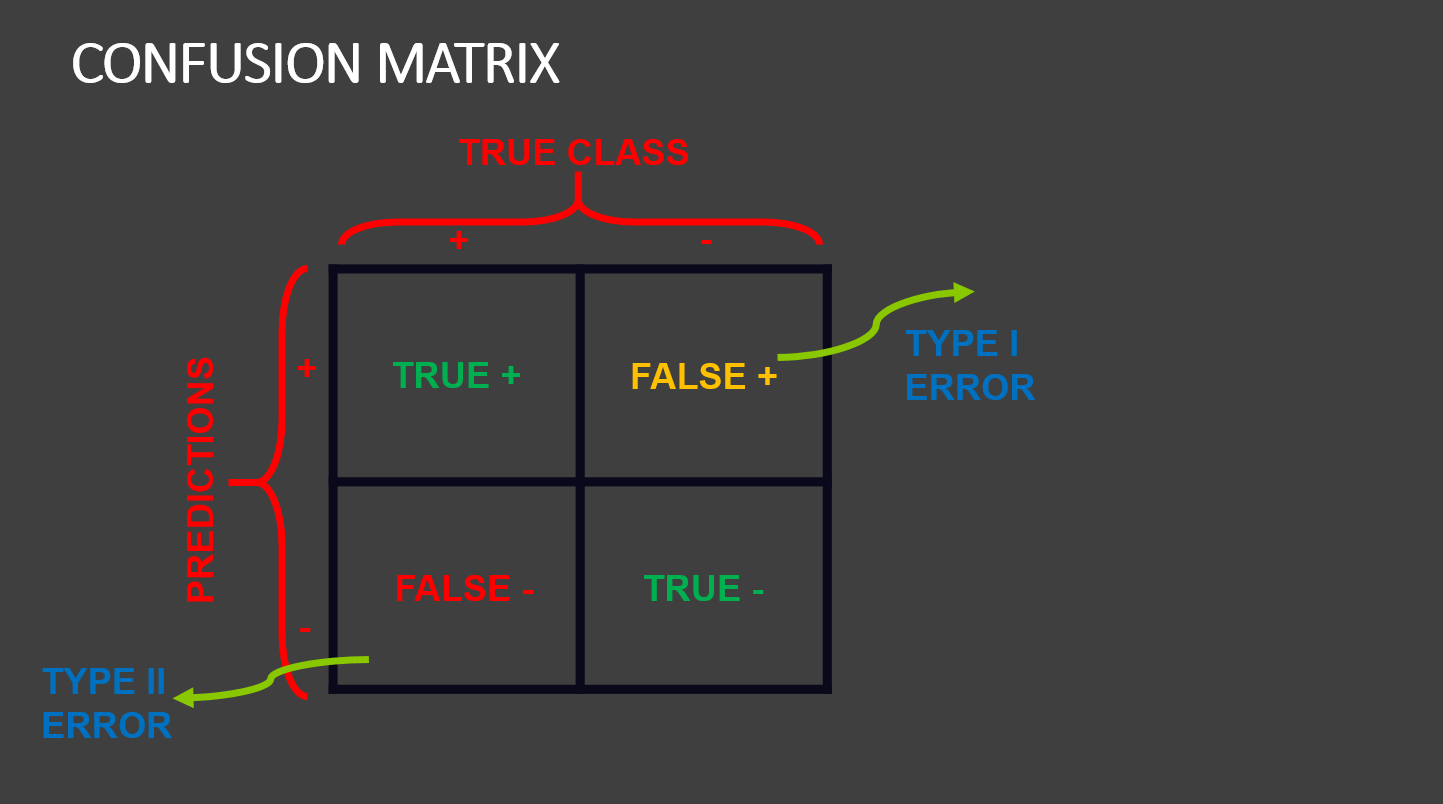

<AxesSubplot:>

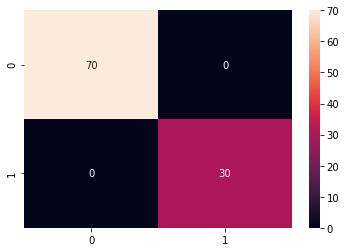

In [46]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<AxesSubplot:>

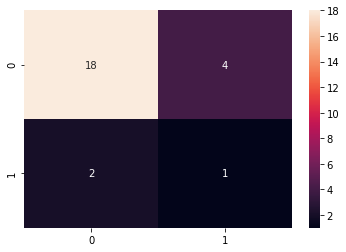

In [47]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [48]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.20      0.33      0.25         3

    accuracy                           0.76        25
   macro avg       0.55      0.58      0.55        25
weighted avg       0.82      0.76      0.78        25



MINI CHALLENGE #6:
- Retrain the model after spliting the data into 30% testing and 70% training and assess model performance


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [50]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

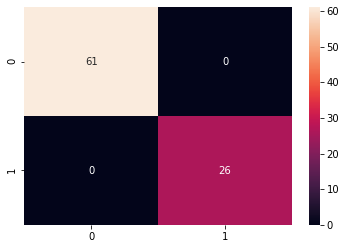

In [51]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<AxesSubplot:>

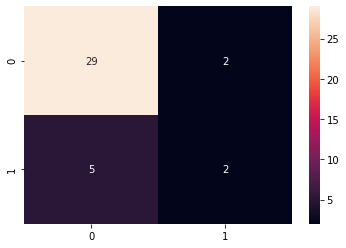

In [52]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [53]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        31
           1       0.50      0.29      0.36         7

    accuracy                           0.82        38
   macro avg       0.68      0.61      0.63        38
weighted avg       0.79      0.82      0.79        38

